In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import os

import warnings

In [2]:
df_clf = pd.read_csv('card_transdata.csv')
df_reg = pd.read_csv('trip_duration_task.csv')

In [3]:
display(df_clf.head(20))
display(df_reg.head(20))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848
5,id1918069,2.0,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455
6,id2429028,1.0,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,397
7,id1663798,2.0,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,1101
8,id2436943,2.0,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,1886
9,id2933909,1.0,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,1429


In [4]:
display(df_reg.info)
display(df_clf.info)

<bound method DataFrame.info of                id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784        2.0  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885        1.0  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912        2.0  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273        2.0  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939        1.0  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982        2.0  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861        1.0  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699        1.0  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912        1.0  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441        2.0  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  

<bound method DataFrame.info of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2            

In [5]:
df_clf = df_clf[:10000]
df_reg = df_reg[:70000]

In [6]:
print((df_clf.isna().sum()/df_clf.shape[0]*100).sort_values(ascending=False))
print((df_reg.isna().sum()/df_reg.shape[0]*100).sort_values(ascending=False))

distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64
vendor_id            0.322857
pickup_latitude      0.261429
id                   0.000000
pickup_datetime      0.000000
passenger_count      0.000000
dropoff_datetime     0.000000
pickup_longitude     0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
trip_duration        0.000000
dtype: float64


In [7]:
df_clf=df_clf.dropna()
df_reg=df_reg.dropna()
print((df_clf.isna().sum()/df_clf.shape[0]*100).sort_values(ascending=False))
print((df_reg.isna().sum()/df_reg.shape[0]*100).sort_values(ascending=False))

distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64
id                   0.0
vendor_id            0.0
pickup_datetime      0.0
dropoff_datetime     0.0
passenger_count      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
trip_duration        0.0
dtype: float64


In [8]:
print('Проверка признаков классификации')
m = ['fraud', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
for i in m:
    print(df_clf[i].unique())

print()

print('Проверка признаков регрессии')
print(df_reg['vendor_id'].unique())

Проверка признаков классификации
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]

Проверка признаков регрессии
[2. 1.]


In [9]:
from datetime import datetime

df_reg['pickup_datetime'] = pd.to_datetime(df_reg['pickup_datetime'])
df_reg['dropoff_datetime'] = pd.to_datetime(df_reg['dropoff_datetime'])

df_reg['pickup_hour'] = df_reg['pickup_datetime'].dt.hour
df_reg['pickup_day_of_week'] = df_reg['pickup_datetime'].dt.dayofweek  # 0-6 (пн-вс)
df_reg['pickup_day'] = df_reg['pickup_datetime'].dt.day
df_reg['pickup_month'] = df_reg['pickup_datetime'].dt.month
df_reg['pickup_year'] = df_reg['pickup_datetime'].dt.year

# Будни/выходные
df_reg['is_weekend'] = (df_reg['pickup_day_of_week'] >= 5).astype(int)

def time_of_day(hour):
    if 5 <= hour < 12: return 0  # утро
    elif 12 <= hour < 17: return 1  # день
    elif 17 <= hour < 22: return 2  # вечер
    else: return 3  # ночь

df_reg['time_of_day'] = df_reg['pickup_hour'].apply(time_of_day)

from geopy.distance import great_circle

def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(pickup, dropoff).km

df_reg['distance_km'] = df_reg.apply(calculate_distance, axis=1)

In [10]:
from sklearn.cluster import KMeans

 # создаём кластеры pickup и dropoff координат
def create_cluster_features(df, n_clusters=20):
    df = df.copy()
    
    coords_pickup = df[['pickup_latitude', 'pickup_longitude']].values
    coords_dropoff = df[['dropoff_latitude', 'dropoff_longitude']].values
    
    kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['pickup_cluster'] = kmeans_pickup.fit_predict(coords_pickup)
    
    kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['dropoff_cluster'] = kmeans_dropoff.fit_predict(coords_dropoff)
    
    return df, kmeans_pickup, kmeans_dropoff

df_with_clusters, kmeans_pickup, kmeans_dropoff = create_cluster_features(df_reg, n_clusters=20)

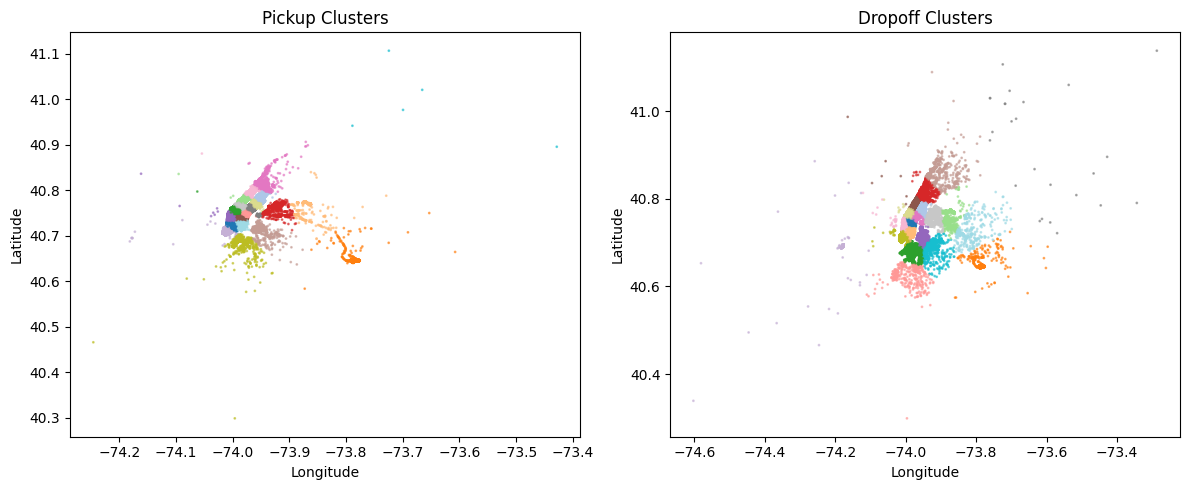

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_with_clusters['pickup_longitude'], df_with_clusters['pickup_latitude'], 
            c=df_with_clusters['pickup_cluster'], cmap='tab20', alpha=0.6, s=1)
plt.title('Pickup Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.scatter(df_with_clusters['dropoff_longitude'], df_with_clusters['dropoff_latitude'], 
            c=df_with_clusters['dropoff_cluster'], cmap='tab20', alpha=0.6, s=1)
plt.title('Dropoff Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

In [12]:
display(df_with_clusters.head(20))

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,is_weekend,time_of_day,distance_km,pickup_cluster,dropoff_cluster
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400,16,0,29,2,2016,0,1,1.199074,1,1
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100,23,4,11,3,2016,0,3,4.129117,19,4
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635,17,6,21,2,2016,1,2,7.250763,0,1
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141,9,1,5,1,2016,0,0,2.361101,14,1
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848,6,2,17,2,2016,0,0,4.328540,9,0
5,id1918069,2.0,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455,18,6,14,2,2016,1,2,3.119716,4,3
6,id2429028,1.0,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,397,20,2,20,4,2016,0,2,1.143981,14,12
7,id1663798,2.0,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,1101,16,6,19,6,2016,1,1,7.763600,17,5
8,id2436943,2.0,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,1886,19,0,28,3,2016,0,2,9.043660,3,17
9,id2933909,1.0,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,1429,22,6,10,4,2016,1,3,6.138319,10,4


In [13]:
df_reg = df_with_clusters

In [14]:
from sklearn.preprocessing import LabelEncoder

for i in m:
    df_clf[i]=LabelEncoder().fit_transform(df_clf[i])

df_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  int64  
 4   used_chip                       10000 non-null  int64  
 5   used_pin_number                 10000 non-null  int64  
 6   online_order                    10000 non-null  int64  
 7   fraud                           10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [15]:
df_reg = df_reg.drop(['pickup_datetime', 'dropoff_datetime', 'id'], axis=1)

In [16]:
display(df_clf.head(20))
display(df_reg.head(20))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
5,5.586408,13.261073,0.064768,1,0,0,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0
7,4.848247,0.320735,1.273050,1,0,1,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,is_weekend,time_of_day,distance_km,pickup_cluster,dropoff_cluster
0,2.0,1,-73.953918,40.778873,-73.963875,40.771164,400,16,0,29,2,2016,0,1,1.199074,1,1
1,1.0,2,-73.988312,40.731743,-73.994751,40.694931,1100,23,4,11,3,2016,0,3,4.129117,19,4
2,2.0,2,-73.997314,40.721458,-73.948029,40.774918,1635,17,6,21,2,2016,1,2,7.250763,0,1
3,2.0,6,-73.961670,40.759720,-73.956779,40.780628,1141,9,1,5,1,2016,0,0,2.361101,14,1
4,1.0,1,-74.017120,40.708469,-73.988182,40.740631,848,6,2,17,2,2016,0,0,4.328540,9,0
5,2.0,2,-73.993614,40.751884,-73.995422,40.723862,1455,18,6,14,2,2016,1,2,3.119716,4,3
6,1.0,1,-73.965080,40.758915,-73.976807,40.764107,397,20,2,20,4,2016,0,2,1.143981,14,12
7,2.0,1,-73.963890,40.765434,-73.872429,40.774200,1101,16,6,19,6,2016,1,1,7.763600,17,5
8,2.0,2,-73.872887,40.774281,-73.979019,40.761879,1886,19,0,28,3,2016,0,2,9.043660,3,17
9,1.0,1,-73.987823,40.740982,-73.999153,40.686451,1429,22,6,10,4,2016,1,3,6.138319,10,4


In [17]:
print(df_clf.duplicated().sum())
print(df_reg.duplicated().sum())

0
0


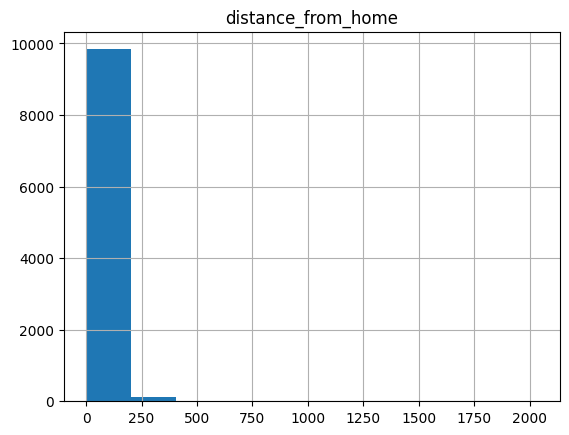

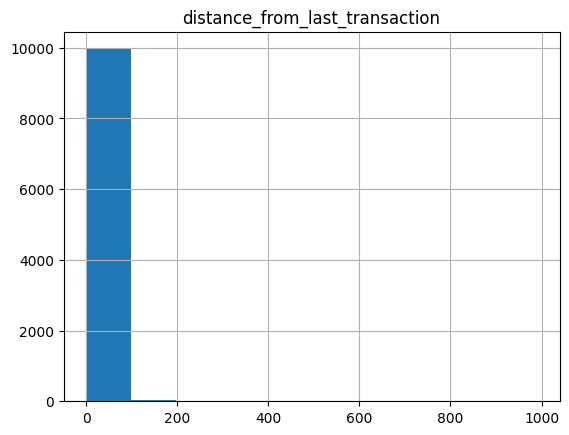

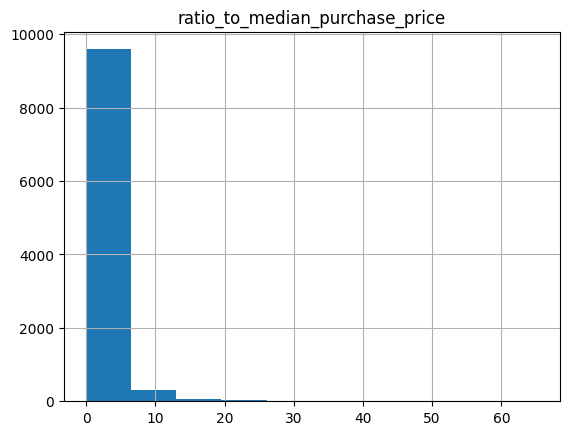

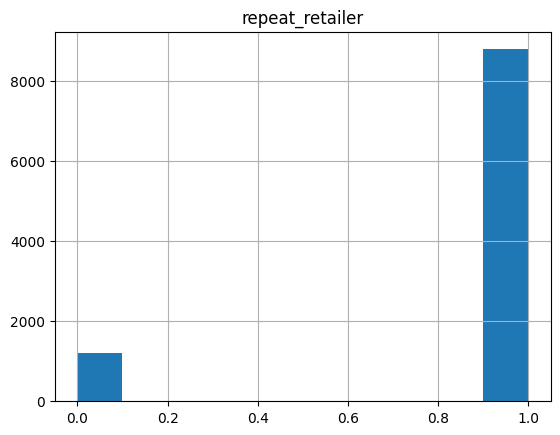

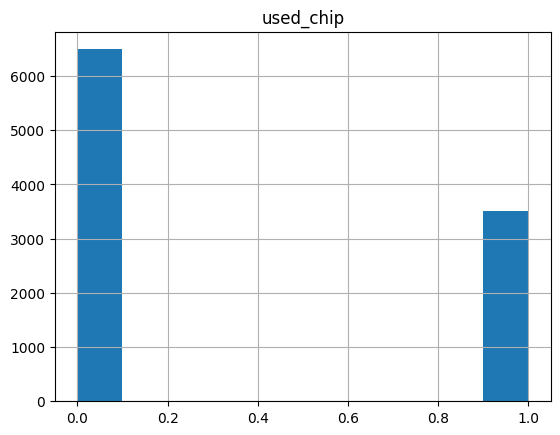

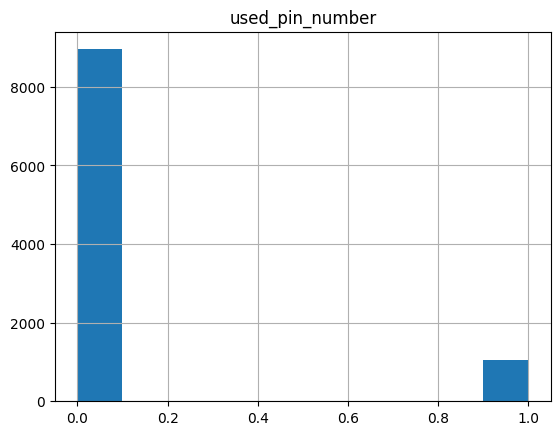

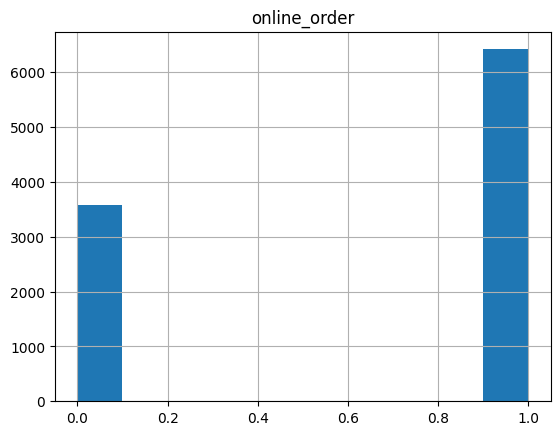

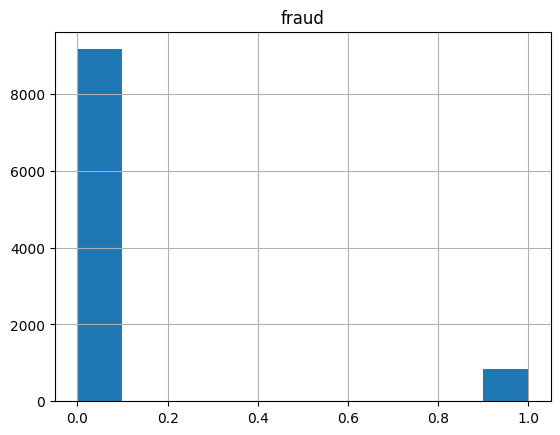

In [18]:
columns_clf = ['distance_from_home',	'distance_from_last_transaction',	'ratio_to_median_purchase_price',
'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order',	'fraud']
for column in columns_clf:
    df_clf.hist(column)

In [19]:
outlier = df_clf[['distance_from_home',	'distance_from_last_transaction',	'ratio_to_median_purchase_price']]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1

data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

index_list = list(data_filtered.index.values)

df_clf = df_clf[df_clf.index.isin(index_list)]

df_clf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7178 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              7178 non-null   float64
 1   distance_from_last_transaction  7178 non-null   float64
 2   ratio_to_median_purchase_price  7178 non-null   float64
 3   repeat_retailer                 7178 non-null   int64  
 4   used_chip                       7178 non-null   int64  
 5   used_pin_number                 7178 non-null   int64  
 6   online_order                    7178 non-null   int64  
 7   fraud                           7178 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 504.7 KB


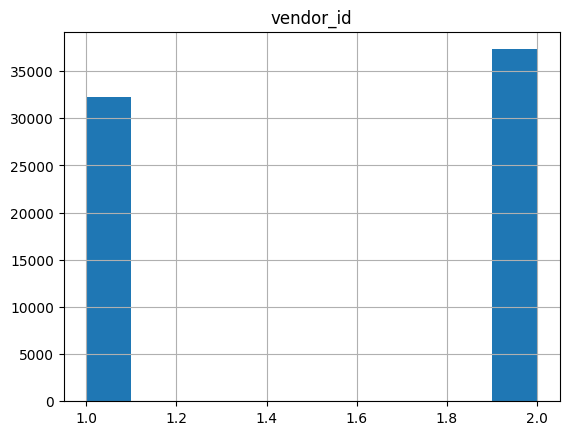

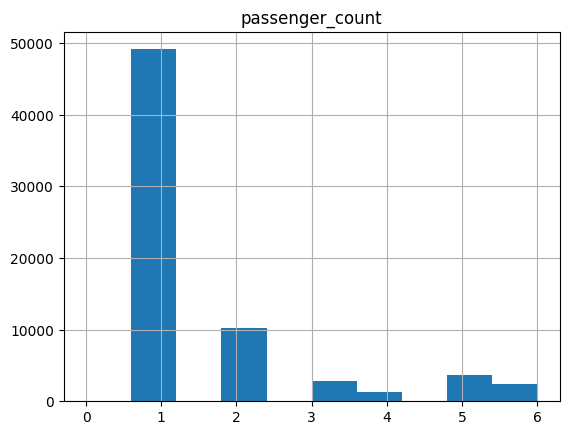

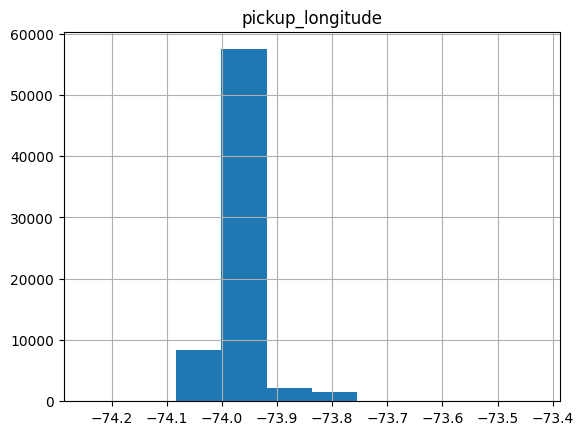

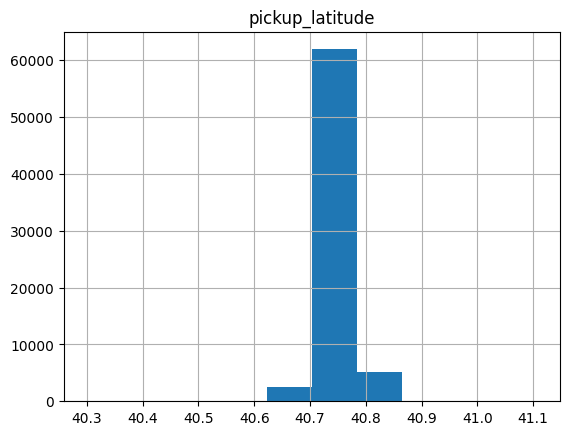

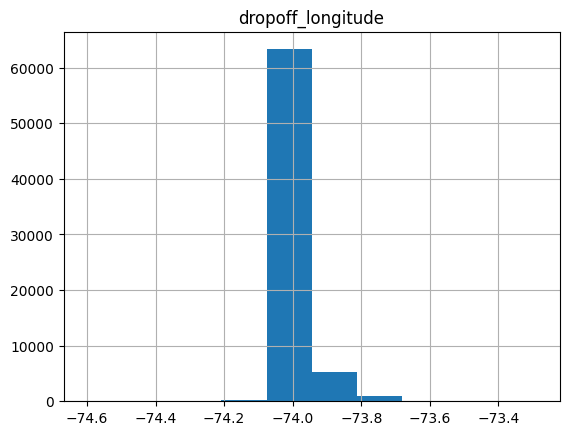

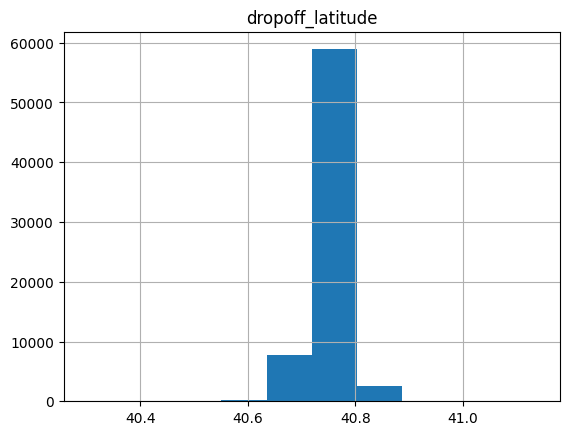

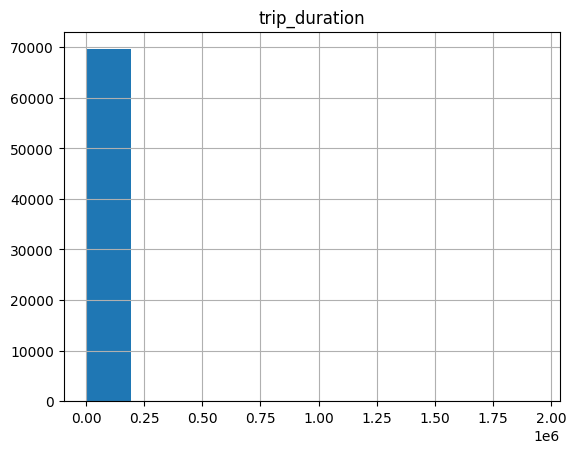

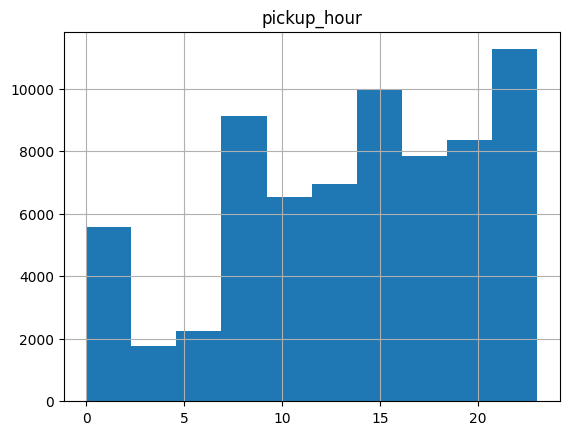

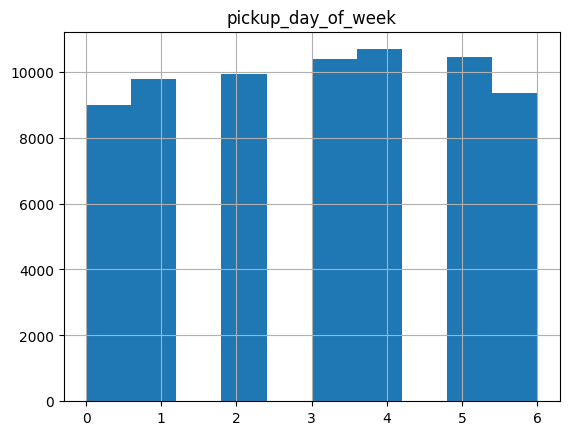

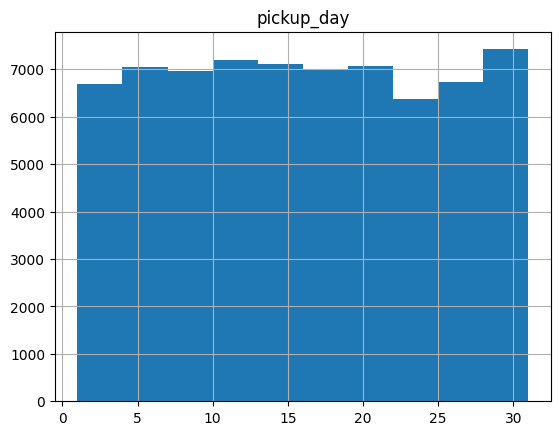

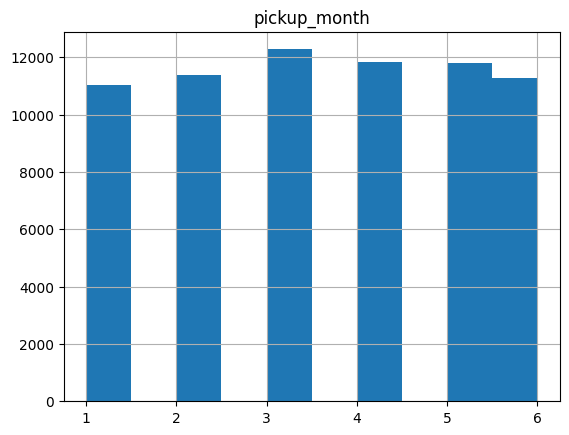

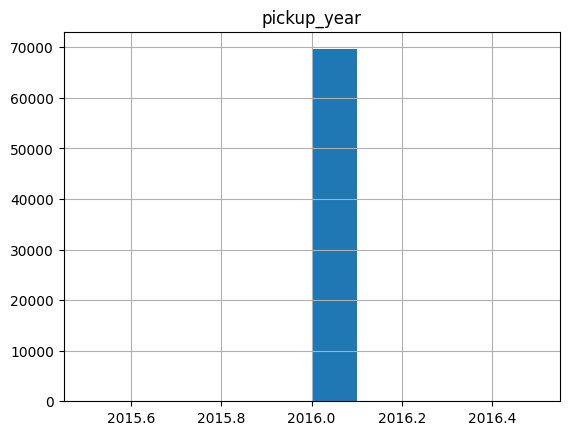

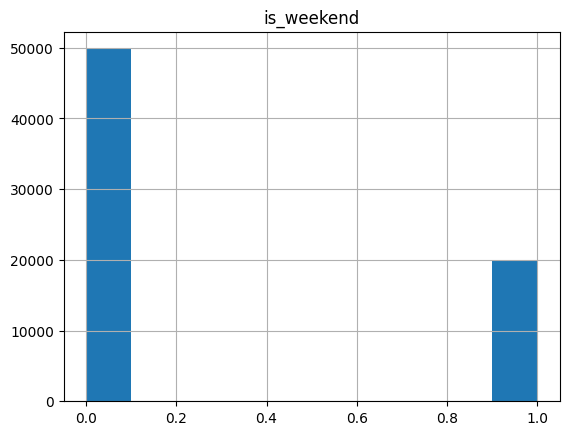

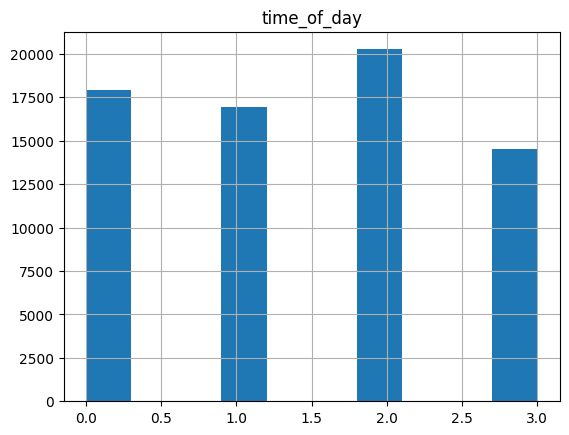

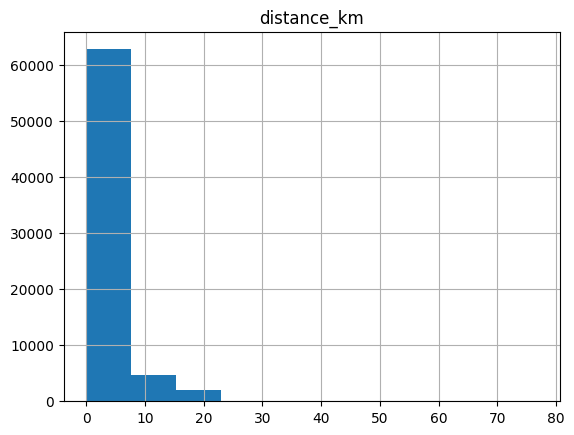

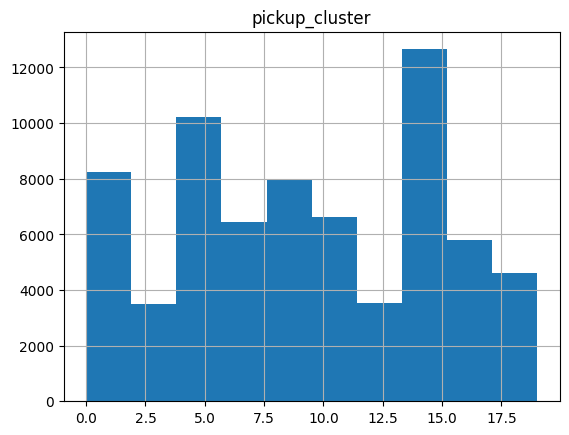

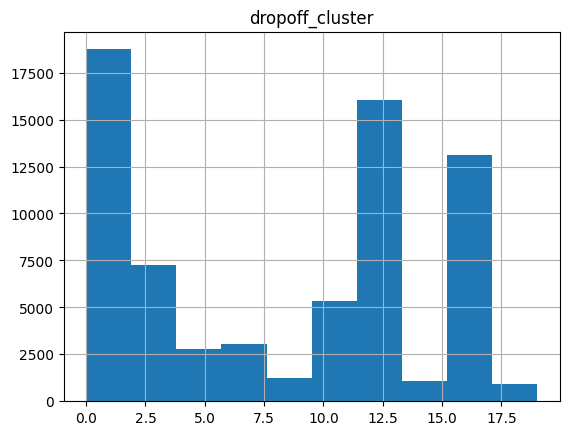

In [20]:
columns_reg = ['vendor_id',	'passenger_count',	'pickup_longitude',	'pickup_latitude', 	'dropoff_longitude',	'dropoff_latitude',
           'trip_duration',	'pickup_hour',	'pickup_day_of_week',	'pickup_day',	'pickup_month',	'pickup_year',	'is_weekend',
           'time_of_day',	'distance_km', 'pickup_cluster', 'dropoff_cluster']
for column in columns_reg:
    df_reg.hist(column)

In [21]:
outlier = df_reg[['distance_km', 'trip_duration']]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1

data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

index_list = list(data_filtered.index.values)

df_reg = df_reg[df_reg.index.isin(index_list)]

df_reg = df_reg.drop(['pickup_year'], axis =1 )

df_reg.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,is_weekend,time_of_day,distance_km,pickup_cluster,dropoff_cluster
0,2.0,1,-73.953918,40.778873,-73.963875,40.771164,400,16,0,29,2,0,1,1.199074,1,1
1,1.0,2,-73.988312,40.731743,-73.994751,40.694931,1100,23,4,11,3,0,3,4.129117,19,4
2,2.0,2,-73.997314,40.721458,-73.948029,40.774918,1635,17,6,21,2,1,2,7.250763,0,1
3,2.0,6,-73.961670,40.759720,-73.956779,40.780628,1141,9,1,5,1,0,0,2.361101,14,1
4,1.0,1,-74.017120,40.708469,-73.988182,40.740631,848,6,2,17,2,0,0,4.328540,9,0


In [22]:
df_clf['movement_ratio'] = df_clf['distance_from_last_transaction'] / (df_clf['distance_from_home'] + 1e-5)

print(df_clf[['distance_from_home', 'distance_from_last_transaction', 'movement_ratio']].head())

   distance_from_home  distance_from_last_transaction  movement_ratio
0           57.877857                        0.311140        0.005376
1           10.829943                        0.175592        0.016214
2            5.091079                        0.805153        0.158149
3            2.247564                        5.600044        2.491594
4           44.190936                        0.566486        0.012819


In [23]:
corelation_clf = df_clf.corr()
print(corelation_clf['fraud'])

corelation_reg = df_reg.corr()
print(corelation_reg['trip_duration'])

distance_from_home               -0.000160
distance_from_last_transaction   -0.006501
ratio_to_median_purchase_price    0.324327
repeat_retailer                  -0.010223
used_chip                        -0.036437
used_pin_number                  -0.036642
online_order                      0.070385
fraud                             1.000000
movement_ratio                   -0.008709
Name: fraud, dtype: float64
vendor_id             0.003149
passenger_count       0.010715
pickup_longitude     -0.054181
pickup_latitude      -0.076276
dropoff_longitude     0.004650
dropoff_latitude     -0.110758
trip_duration         1.000000
pickup_hour           0.045697
pickup_day_of_week   -0.027354
pickup_day            0.006925
pickup_month          0.054471
is_weekend           -0.059646
time_of_day          -0.034212
distance_km           0.688965
pickup_cluster       -0.004314
dropoff_cluster       0.054463
Name: trip_duration, dtype: float64


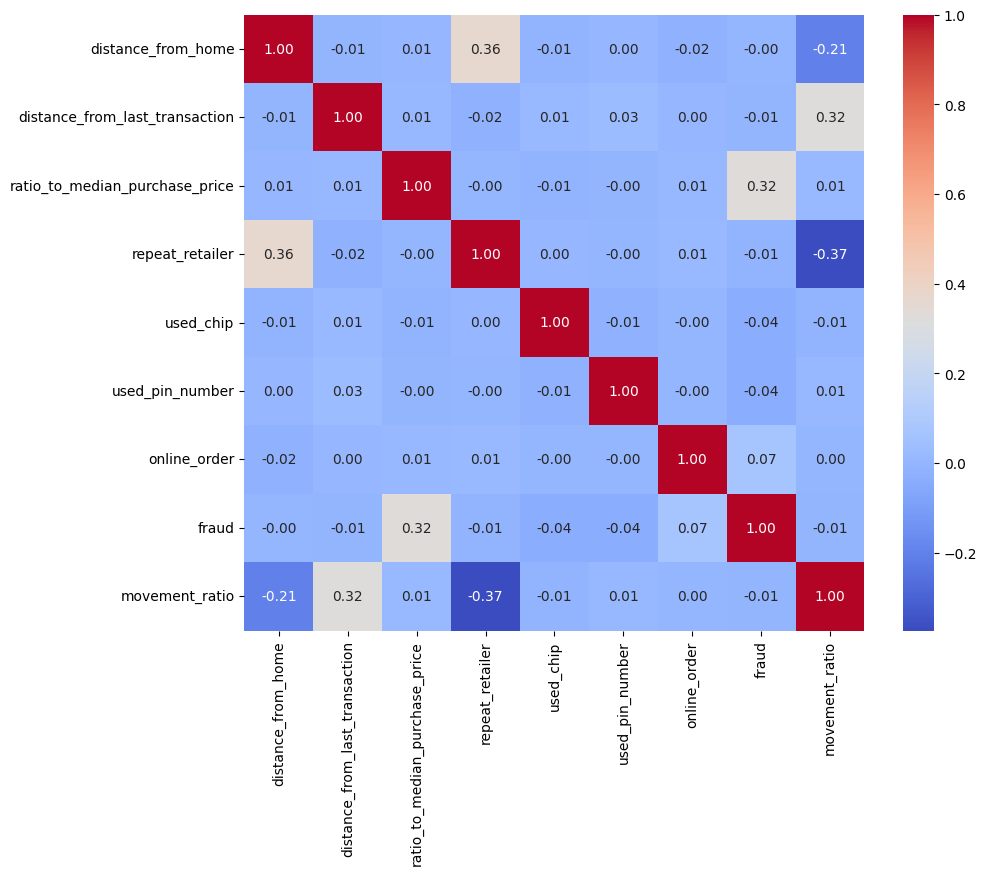

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_clf, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

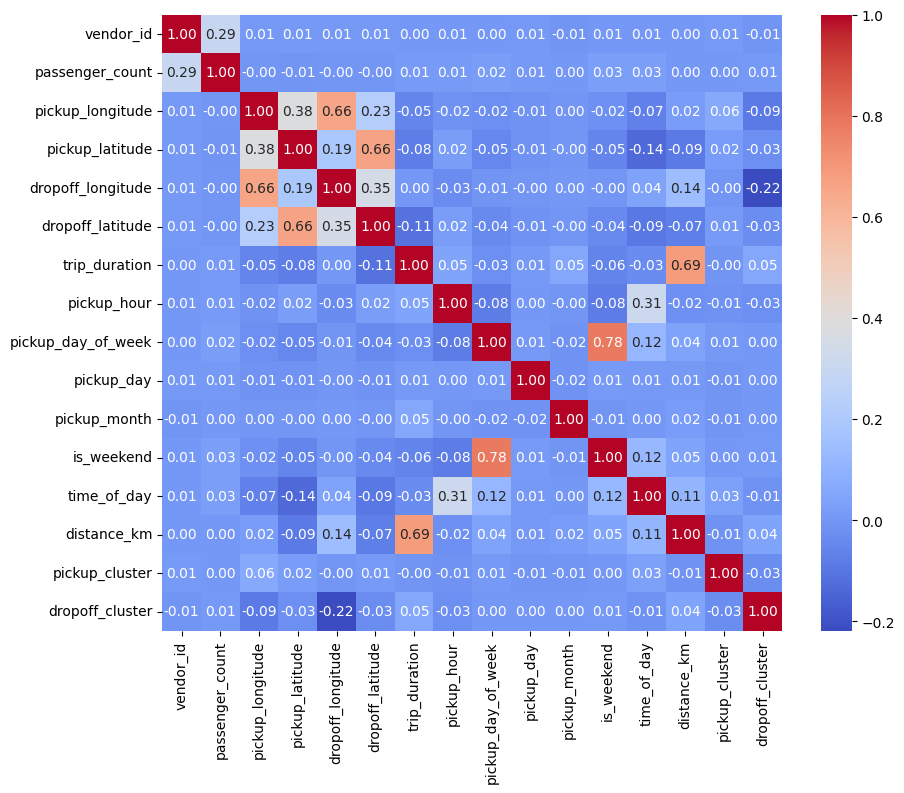

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_reg, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [26]:
x_clf = df_clf.drop(["fraud"], axis=1)
y_clf = df_clf["fraud"]

x_reg = df_reg.drop(["trip_duration"], axis=1)
y_reg = df_reg["trip_duration"]

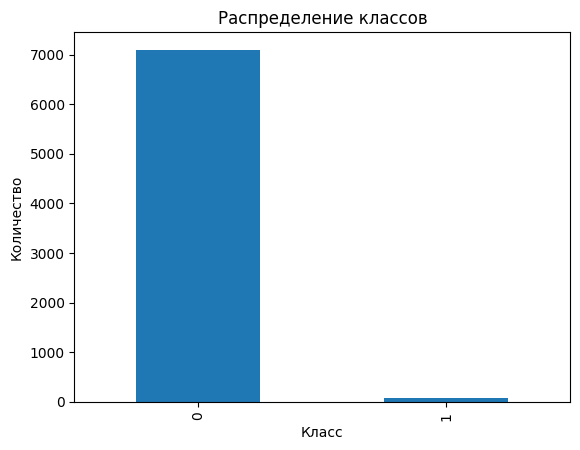

In [27]:
y_clf.value_counts().plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

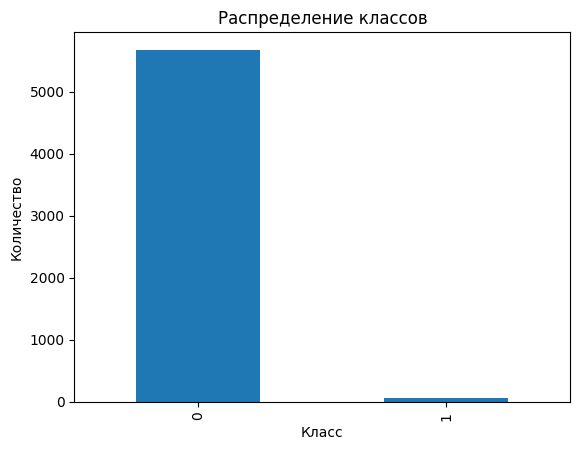

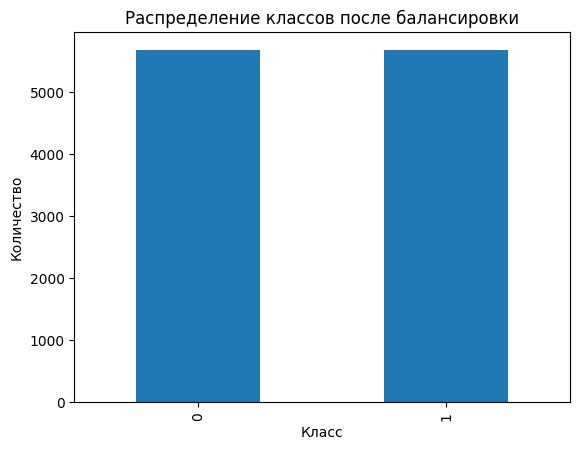

In [28]:
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

y_train_clf.value_counts().plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_train_clf, y_train_clf = smote.fit_resample(x_train_clf, y_train_clf)

y_train_clf.value_counts().plot(kind='bar')
plt.title('Распределение классов после балансировки')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

In [29]:
scaler = StandardScaler()
x_train_clf = scaler.fit_transform(x_train_clf)
x_test_clf = scaler.transform(x_test_clf)

In [30]:
class Clf_Dataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.LongTensor(labels.values)
        
    def __len__(self):
        return len(self.labels)
        
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

class Reg_Dataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels.values)
        
    def __len__(self):
        return len(self.labels)
        
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Создаем Dataset
train_dataset_clf = Clf_Dataset(x_train_clf, y_train_clf)
test_dataset_clf = Clf_Dataset(x_test_clf, y_test_clf)

# Создаем DataLoader
train_loader_clf = DataLoader(train_dataset_clf, batch_size=32, shuffle=True)
test_loader_clf = DataLoader(test_dataset_clf, batch_size=32, shuffle=False)

# Масштабирование данных для регрессии
scaler_reg = StandardScaler()
x_train_reg = scaler_reg.fit_transform(x_train_reg)
x_test_reg = scaler_reg.transform(x_test_reg)

# Создание Dataset и DataLoader для регрессии
train_dataset_reg = Reg_Dataset(x_train_reg, y_train_reg)
test_dataset_reg = Reg_Dataset(x_test_reg, y_test_reg)

train_loader_reg = DataLoader(train_dataset_reg, batch_size=32, shuffle=True)
test_loader_reg = DataLoader(test_dataset_reg, batch_size=32, shuffle=False)

In [77]:
# архитектуры нейронных сетей
class ClassificationNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ClassificationNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, x):
        return self.network(x)

# тут много вариантов, потому что проводилось тестирование разных конфигураций нейросетей, ввиду малого R2 
class RegressionNN_V0(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN_V0, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.network(x)

class RegressionNN_V1(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN_V1, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.1),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.network(x)

class RegressionNN_V2(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN_V2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1)
        )
        
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        return self.output(x3)

class RegressionNN_V3(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN_V3, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(0.1),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.LeakyReLU(0.1),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.LeakyReLU(0.1),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            
            nn.Linear(128, 1)
        )
        
    def forward(self, x):
        return self.network(x)

class RegressionNN_V4(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN_V4, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        return self.network(x)

class RegressionNN_V5(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)

class RegressionNN_V6(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN_V6, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        
    def forward(self, x):
        return self.network(x)

# создание моделей
input_size_clf = x_train_clf.shape[1]
num_classes = len(y_train_clf.unique())
model_clf = ClassificationNN(input_size_clf, num_classes)

input_size_reg = x_train_reg.shape[1]
model_reg = RegressionNN_V6(input_size_reg)

# функции потерь и оптимизаторы
criterion_clf = nn.NLLLoss() # даёт результаты лучше чем 
# nn.CrossEntropyLoss() # тут тоже есть softmax: формула Loss = -log(softmax(logits)[true_class]), если добавить ещё в архитектуру результат ухудшится 
criterion_reg =  nn.SmoothL1Loss()

optimizer_clf = optim.Adam(model_clf.parameters(), lr=0.001)
optimizer_reg = optim.AdamW(model_reg.parameters(), lr=0.001)

In [78]:
def train_model(model, train_loader, criterion, optimizer, num_epochs, model_type='classification'):
    train_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            
            if model_type == 'classification':
                loss = criterion(output, target)
            else:
                loss = criterion(output.squeeze(), target)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    
    return train_losses

In [79]:
print("Классификация:")
train_losses_clf = train_model(model_clf, train_loader_clf, criterion_clf, optimizer_clf, 
                                num_epochs=100, model_type='classification')

Классификация:
Epoch [10/100], Loss: 0.0064
Epoch [20/100], Loss: 0.0039
Epoch [30/100], Loss: 0.0029
Epoch [40/100], Loss: 0.0012
Epoch [50/100], Loss: 0.0024
Epoch [60/100], Loss: 0.0025
Epoch [70/100], Loss: 0.0016
Epoch [80/100], Loss: 0.0033
Epoch [90/100], Loss: 0.0016
Epoch [100/100], Loss: 0.0022


In [82]:
print("Регрессия:")
train_losses_reg = train_model(model_reg, train_loader_reg, criterion_reg, optimizer_reg, 
                                num_epochs=30, model_type='regression')

Регрессия:
Epoch [10/30], Loss: 179.6194
Epoch [20/30], Loss: 175.8226
Epoch [30/30], Loss: 173.2534


In [88]:
def evaluate_classification(model, train_loader, test_loader):
    model.eval()
    all_predictions_train = []
    all_targets_train = []
    all_predictions_test = []
    all_targets_test = []
    
    # train
    with torch.no_grad():
        for data, target in train_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            all_predictions_train.extend(predicted.numpy())
            all_targets_train.extend(target.numpy())
    
    # test
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            all_predictions_test.extend(predicted.numpy())
            all_targets_test.extend(target.numpy())
    
    accuracy_train = accuracy_score(all_targets_train, all_predictions_train)
    accuracy_test = accuracy_score(all_targets_test, all_predictions_test)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses_clf)
    plt.title('Функция потерь - Классификация')
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
    plt.grid(True)
    
    print("=== TRAIN ===")
    print(f"Accuracy: {accuracy_train:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_targets_train, all_predictions_train))
    
    print("\n=== TEST ===")
    print(f"Accuracy: {accuracy_test:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_targets_test, all_predictions_test))
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    cm_train = confusion_matrix(all_targets_train, all_predictions_train)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Train')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.subplot(1, 2, 2)
    cm_test = confusion_matrix(all_targets_test, all_predictions_test)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Test')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()
    
    return accuracy_train, accuracy_test

def evaluate_regression(model, train_loader, test_loader):
    model.eval()
    all_predictions_train = []
    all_targets_train = []
    all_predictions_test = []
    all_targets_test = []
    
    # train 
    with torch.no_grad():
        for data, target in train_loader:
            output = model(data)
            all_predictions_train.extend(output.squeeze().numpy())
            all_targets_train.extend(target.numpy())
    
    # test
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            all_predictions_test.extend(output.squeeze().numpy())
            all_targets_test.extend(target.numpy())
    
    mse_train = mean_squared_error(all_targets_train, all_predictions_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(all_targets_train, all_predictions_train)
    
    mse_test = mean_squared_error(all_targets_test, all_predictions_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(all_targets_test, all_predictions_test)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 2)
    plt.plot(train_losses_reg)
    plt.title('Функция потерь - Регрессия')
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    print("=== TRAIN ===")
    print(f"MSE: {mse_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"R² Score: {r2_train:.4f}")
    
    print("\n=== TEST ===")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R² Score: {r2_test:.4f}")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(all_targets_train, all_predictions_train, alpha=0.5)
    plt.plot([min(all_targets_train), max(all_targets_train)], 
             [min(all_targets_train), max(all_targets_train)], 'r--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title('Real vs Predicted Values - Train')
    
    plt.subplot(1, 2, 2)
    plt.scatter(all_targets_test, all_predictions_test, alpha=0.5)
    plt.plot([min(all_targets_test), max(all_targets_test)], 
             [min(all_targets_test), max(all_targets_test)], 'r--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title('Real vs Predicted Values - Test')
    
    plt.tight_layout()
    plt.show()
    
    return (mse_train, r2_train), (mse_test, r2_test)

Оценка классификации:
=== TRAIN ===
Accuracy: 0.9979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1419
           1       0.85      1.00      0.92        17

    accuracy                           1.00      1436
   macro avg       0.93      1.00      0.96      1436
weighted avg       1.00      1.00      1.00      1436


=== TEST ===
Accuracy: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5676
           1       1.00      1.00      1.00      5676

    accuracy                           1.00     11352
   macro avg       1.00      1.00      1.00     11352
weighted avg       1.00      1.00      1.00     11352



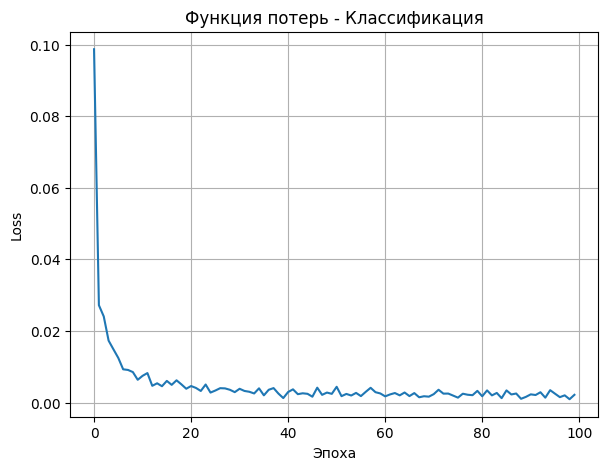

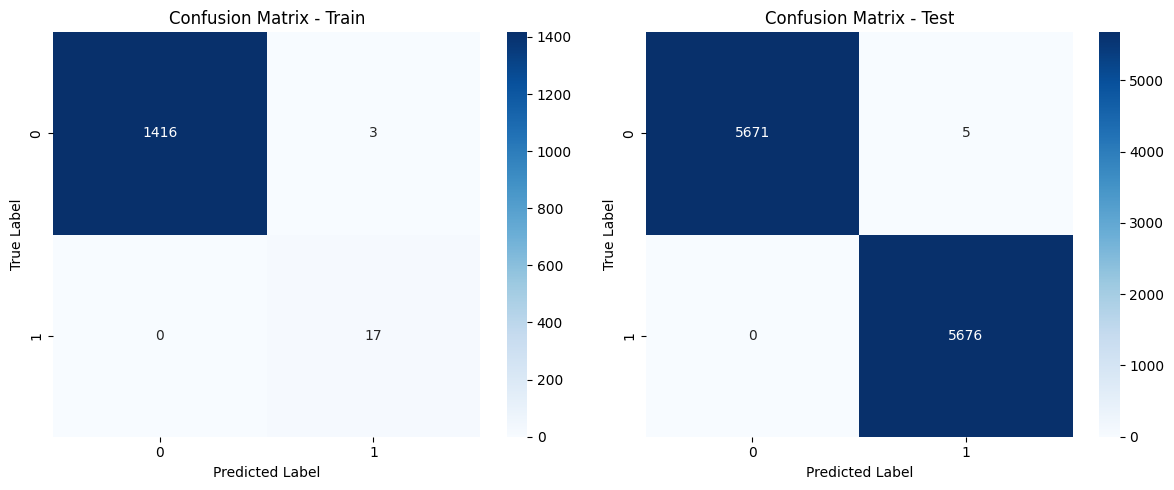

Оценка регрессии:


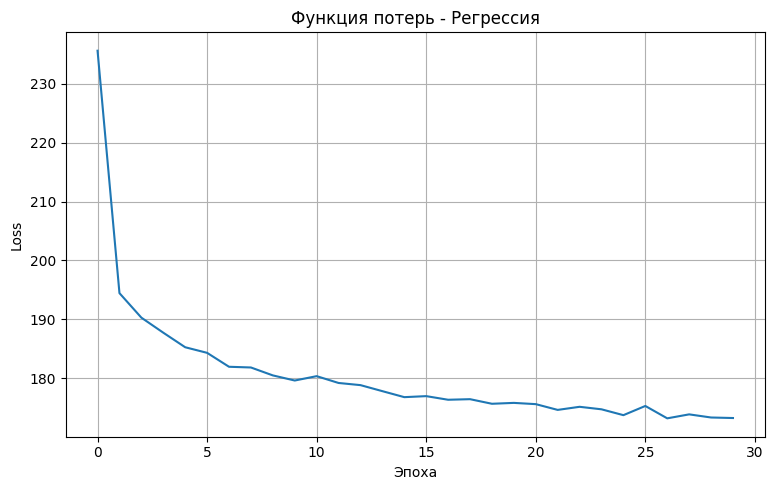

=== TRAIN ===
MSE: 55801.6670
RMSE: 236.2238
R² Score: 0.6610

=== TEST ===
MSE: 52767.2880
RMSE: 229.7113
R² Score: 0.6772


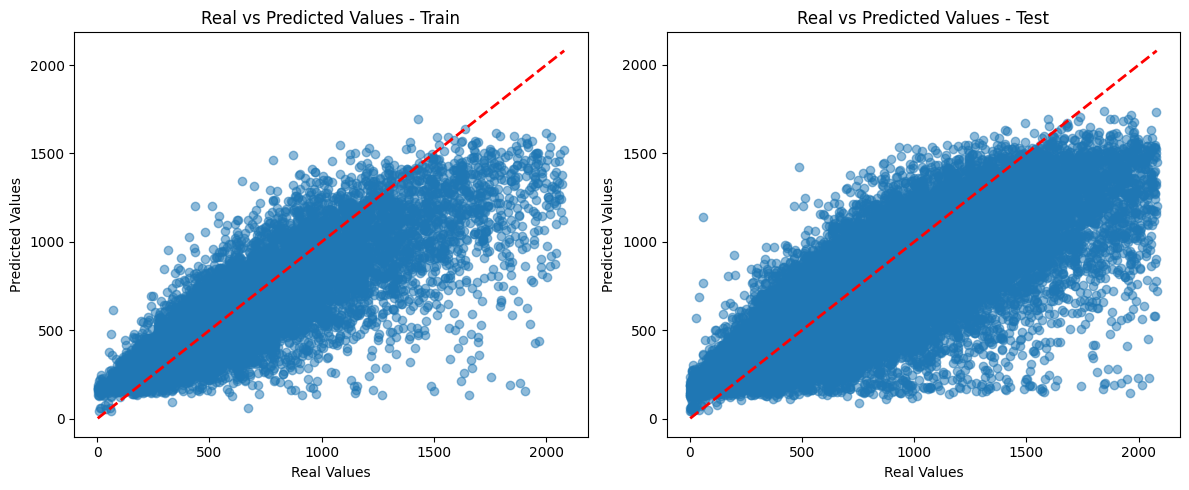

In [87]:
print("Оценка классификации:")
accuracy_clf = evaluate_classification(model_clf, test_loader_clf, train_loader_clf)

print("Оценка регрессии:")
mse_reg, r2_reg = evaluate_regression(model_reg, test_loader_reg, train_loader_reg)